## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('bank-additional-full.csv', sep=';')

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
data.shape


(41188, 21)

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [6]:
bank_target = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [7]:
bank_client = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

bank_client_data = data[bank_client]

for attr in bank_client_data:
    print(f"Unique values for {attr}: {bank_client_data[attr].unique()}")

Unique values for age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Unique values for job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values for marital: ['married' 'single' 'divorced' 'unknown']
Unique values for education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values for default: ['no' 'unknown' 'yes']
Unique values for housing: ['no' 'yes' 'unknown']
Unique values for loan: ['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

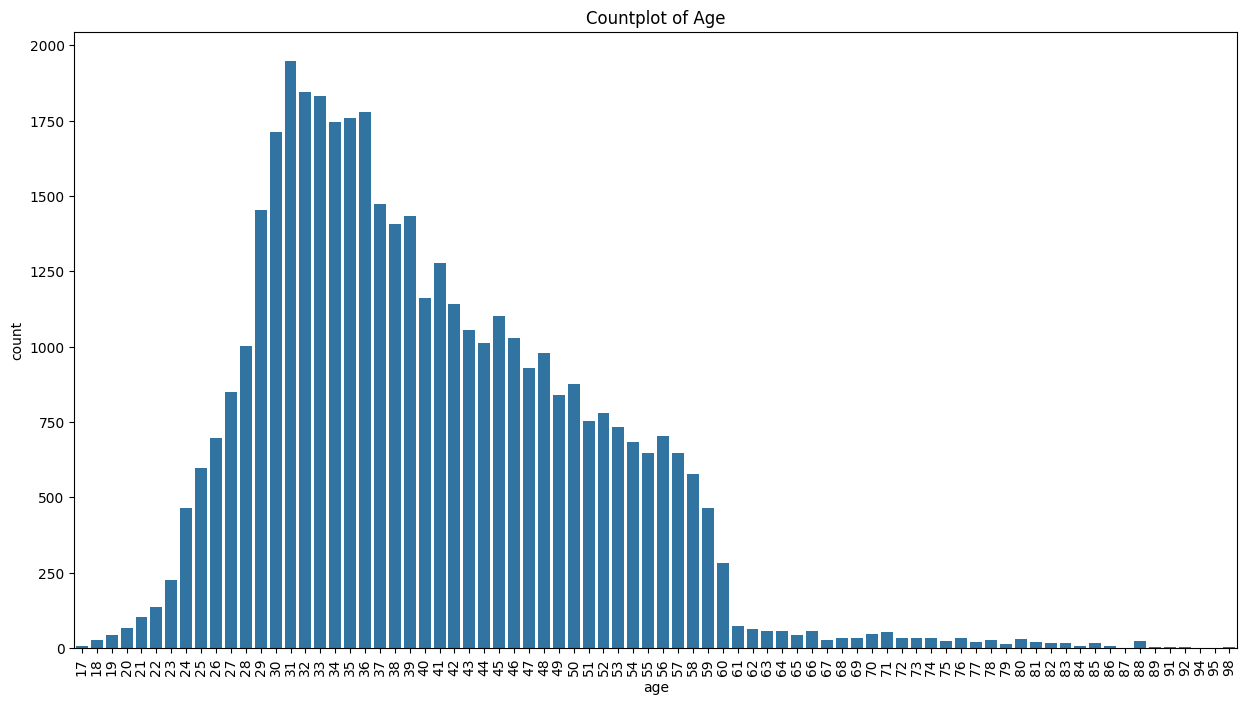

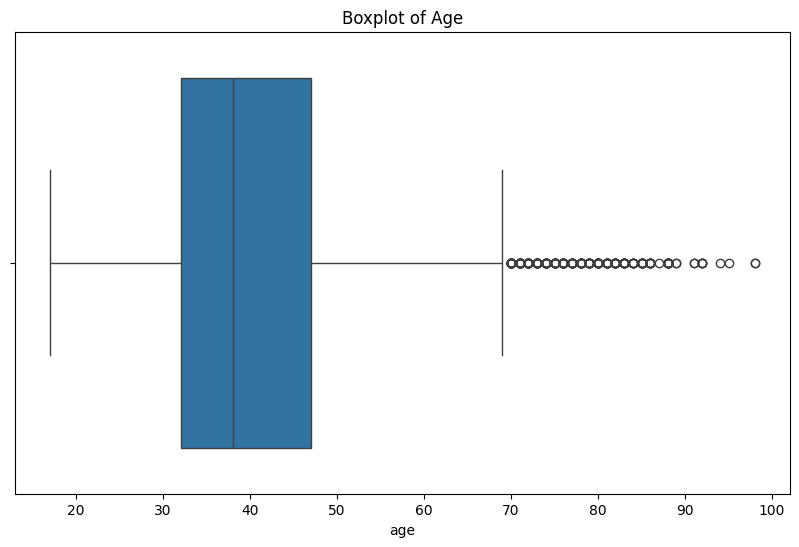

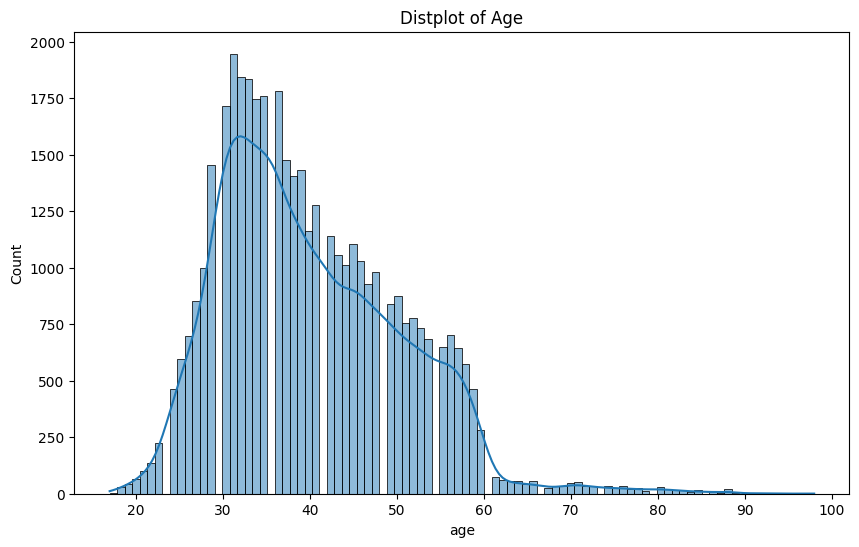

<Figure size 640x480 with 0 Axes>

max_age =  98
min_age =  17
nan =  0


In [20]:
max_age = data['age'].max()
min_age = data['age'].min()

nan = data['age'].isna().sum()


plt.figure(figsize=(15, 8))
sns.countplot(x='age', data=data)
plt.title('Countplot of Age')
plt.xticks(rotation=90)  
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=data)
plt.title('Boxplot of Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Distplot of Age')
plt.show()

plt.tight_layout()
plt.show()


print("max_age = ", max_age)
print("min_age = ", min_age)
print("nan = ", nan)

**Висновки з 1-4 завдання (детальні)**

1.   
2.   
3. ...

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [8]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame, column: str, low_percentile: int, high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers
    """
    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")

    IQR = Q3 - Q1
    print("Interquantile range:", IQR)

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print("Lower bound:", low_lim)
    print("Upper bound:", up_lim)

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print("Outliers in the dataset:")
    display(outliers)

    return outliers

In [9]:
outliers = detect_outliers_with_interquantile_range(bank_client_data, 'age', 10, 90)

Q1 10 percentile of the given data: 28.0
Q3 90 percentile of the given data: 55.0
Interquantile range: 27.0
Lower bound: -12.5
Upper bound: 95.5
Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

В атрибуті Age датасету були виявлені викиди: дві особи з віком 98 років, що перевищують встановлену верхню межу в 95.5 років. Це може свідчити про потенційні помилки в даних або особливості зразка популяції. Важливо розглянути ці викиди при проведенні подальших аналізів та рішень на основі цих даних.








**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

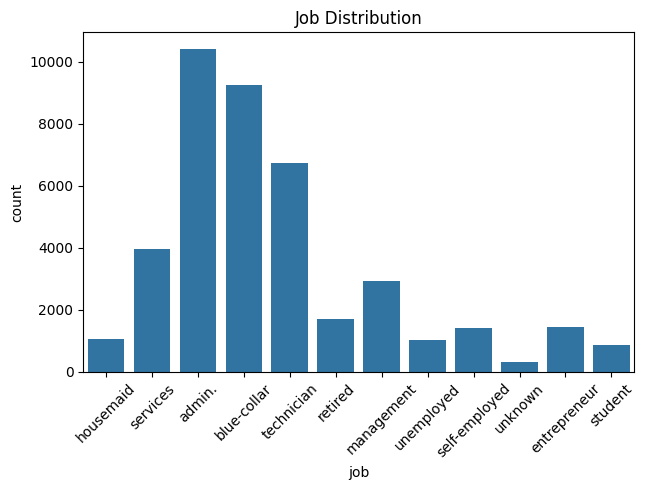

In [17]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='job', data=bank_client_data)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

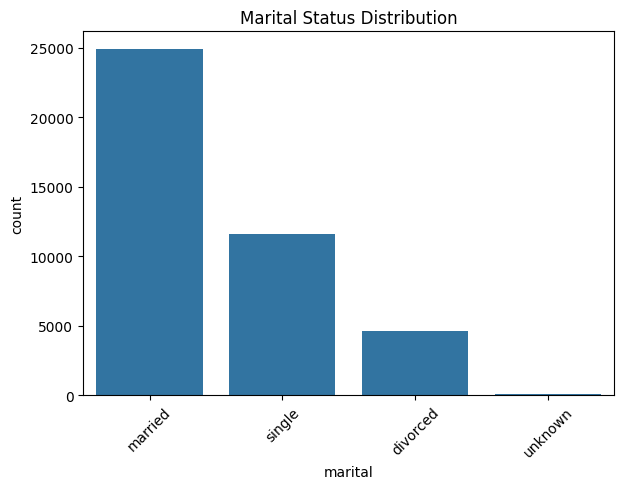

In [18]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 2)
sns.countplot(x='marital', data=bank_client_data)
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()


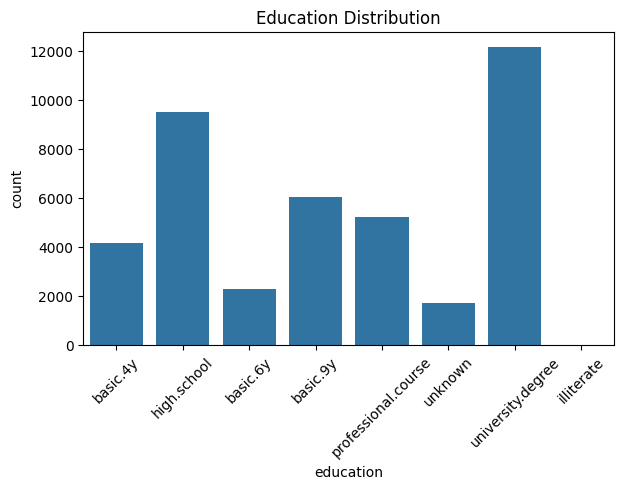

In [19]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.countplot(x='education', data=bank_client_data)
plt.title('Education Distribution')
plt.xticks(rotation=45)
plt.tight_layout()


**Висновки з завдання 6 (детальні)**

1. Діаграма "Job Distribution": На графіку чітко видно, що деякі професії, такі як "admin." і "blue-collar", є найбільш численними серед опитаних. Це може вказувати на високу представленість цих категорій в загальній популяції або на особливості вибірки. Водночас, професії як "unknown", "student", "unemployed" представлені в невеликій кількості, що може свідчити про їх обмежену участь у дослідженні.

2. Діаграма "Marital Status Distribution": Графік показує, що більшість учасників мають статус "married", що робить цю соціальну групу найбільшою серед респондентів. "Single" і "divorced" також є значними категоріями, але їх частка менша порівняно з одруженими. Це може впливати на поведінкові патерни у фінансових та інших сферах дослідження.

3. Діаграма "Education Distribution": На цьому графіку основна маса учасників має освіту рівня "university.degree" або "high.school", що свідчить про досить високий рівень освіченості вибірки. Проте, також присутня значна кількість людей з освітою "basic.9y" і "basic.4y", що вказує на диверсифікацію освітнього рівня учасників.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

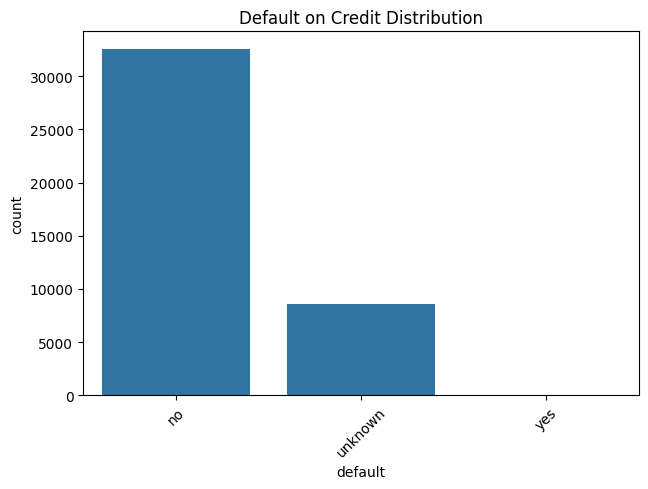

In [20]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='default', data=bank_client_data)
plt.title('Default on Credit Distribution')
plt.xticks(rotation=45)
plt.tight_layout()


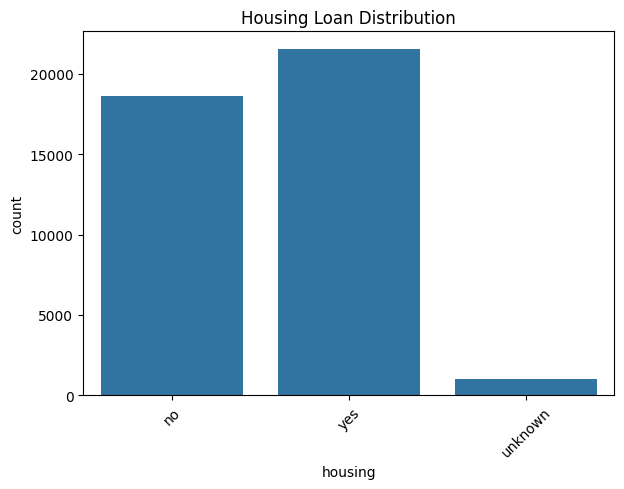

In [21]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 2)
sns.countplot(x='housing', data=bank_client_data)
plt.title('Housing Loan Distribution')
plt.xticks(rotation=45)
plt.tight_layout()


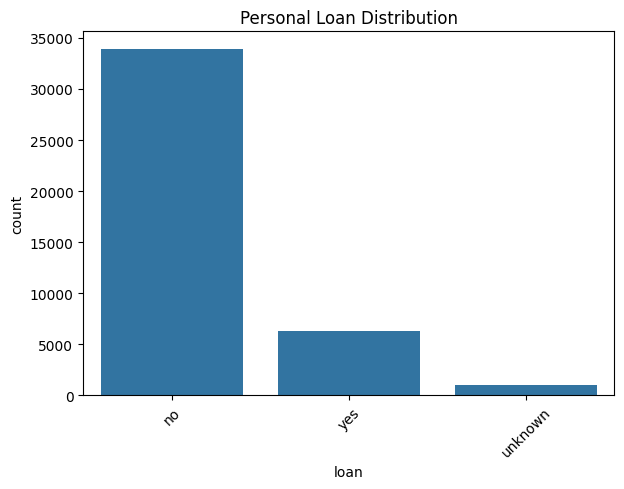

In [22]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.countplot(x='loan', data=bank_client_data)
plt.title('Personal Loan Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [26]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = df[col].fillna('Missing')
        df[col] = le.fit_transform(df[col])
        df[col] = df[col].where(df[col] != 'Missing')
    
    return df


In [27]:
bank_client_encoded = encode_categorical_columns(bank_client_data, ['job', 'marital', 'education', 'default', 'housing', 'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [30]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column using quartile-based discretization 
    
    dataframe: pd.DataFrame to encode
    age_col: age column to encode
    """
    # Define quartile boundaries
    quartiles = dataframe[age_col].quantile([0.25, 0.5, 0.75]).values
    # Discretize the age data into quartiles and add as a new column
    dataframe[age_col + '_quartile'] = pd.cut(dataframe[age_col],
                                              bins=[dataframe[age_col].min()-1, quartiles[0], quartiles[1], quartiles[2], dataframe[age_col].max()],
                                              labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'],
                                              include_lowest=True)
    
    return dataframe

In [31]:
bank_client_encoded = encode_age(bank_client_data, 'age')


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

 1. Використано метод квартильної дискретизації, що дозволяє поділити дані про вік на чотири категорії: від першого до четвертого квартилю. Цей метод допомагає ефективно управляти викидами та може поліпшити точність моделей машинного навчання, оскільки категоріальні дані часто краще обробляються деякими алгоритмами.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [32]:
bank_relat = data[['duration', 'campaign', 'pdays', 'previous', 'poutcome']]

print(bank_relat.head())  

nan_check = bank_relat.isna().sum()  
print(nan_check)

   duration  campaign  pdays  previous     poutcome
0       261         1    999         0  nonexistent
1       149         1    999         0  nonexistent
2       226         1    999         0  nonexistent
3       151         1    999         0  nonexistent
4       307         1    999         0  nonexistent
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [34]:
print("contact:", data['contact'].unique())
print("month:", data['month'].unique())
print("day_of_week:", data['day_of_week'].unique())

contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



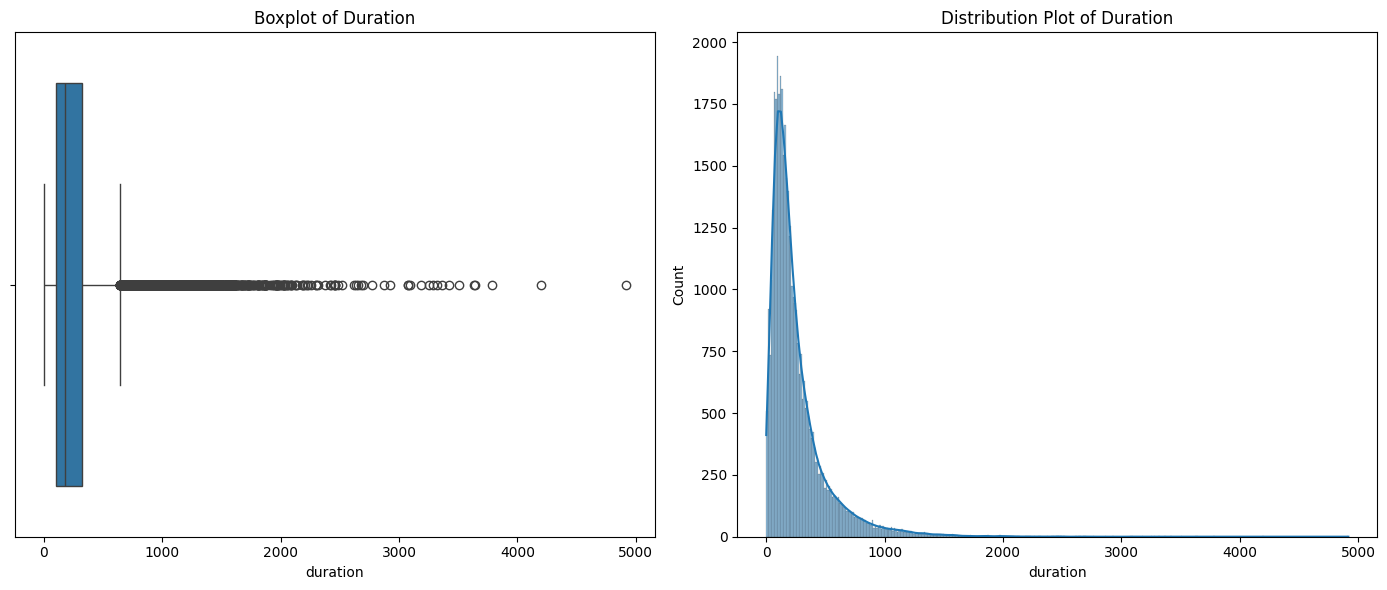

Skewness of duration: 3.263141255262832
Kurtosis of duration: 20.247938014978796


In [35]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['duration'])
plt.title('Boxplot of Duration')

plt.subplot(1, 2, 2)
sns.histplot(data['duration'], kde=True)
plt.title('Distribution Plot of Duration')

plt.tight_layout()
plt.show()

print('Skewness of duration:', data['duration'].skew())
print('Kurtosis of duration:', data['duration'].kurtosis())

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [ ]:
bank_client_new = encode_categorical_columns(data, ['month', 'contact', 'day_of_week'])

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [49]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding 'duration' column 
    
    dataframe: pd.DataFrame to encode
    
    duration_col: 'duration' column to encode
    """
    Q1 = dataframe[duration_col].quantile(0.25)
    Q2 = dataframe[duration_col].quantile(0.5)
    Q3 = dataframe[duration_col].quantile(0.75)

    def quartile_encoding(x):
        if x <= Q1:
            return 0
        elif Q1 < x <= Q2:
            return 1
        elif Q2 < x <= Q3:
            return 2
        else:
            return 3

    dataframe[duration_col + '_encoded'] = dataframe[duration_col].apply(quartile_encoding)
          
    return dataframe

In [ ]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [3]:
bank_socec = data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [4]:
bank_other = data[['campaign', 'pdays', 'previous', 'poutcome']]


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [5]:
poutcome_encoded = pd.get_dummies(data['poutcome'], prefix='poutcome')


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [6]:
bank_final = pd.concat([bank_socec, poutcome_encoded], axis=1)



**Завдання 19** Провести ділення вибірки

In [12]:

def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

target = data['y']  



In [13]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

In [14]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [15]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [18]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7226   53]
 [ 801  158]]
90.0


## k-NN

k=1 83.60 (+/- 2.34)
k=2 89.17 (+/- 0.70)
k=3 88.72 (+/- 0.66)
k=4 89.42 (+/- 0.60)
k=5 88.92 (+/- 0.89)
k=6 89.56 (+/- 0.63)
k=7 89.48 (+/- 0.58)
k=8 89.76 (+/- 0.65)
k=9 89.64 (+/- 0.67)
k=10 89.79 (+/- 0.63)
k=11 89.72 (+/- 0.62)
k=12 89.86 (+/- 0.61)
k=13 89.79 (+/- 0.64)
k=14 89.89 (+/- 0.58)
k=15 89.77 (+/- 0.58)
k=16 89.91 (+/- 0.62)
k=17 89.80 (+/- 0.58)
k=18 89.98 (+/- 0.56)
k=19 89.88 (+/- 0.56)
k=20 90.00 (+/- 0.58)
k=21 89.83 (+/- 0.66)
k=22 89.93 (+/- 0.65)
k=23 89.90 (+/- 0.60)
k=24 89.92 (+/- 0.64)
k=25 89.78 (+/- 0.64)
The optimal number of neighbors is 19 with 90.0%


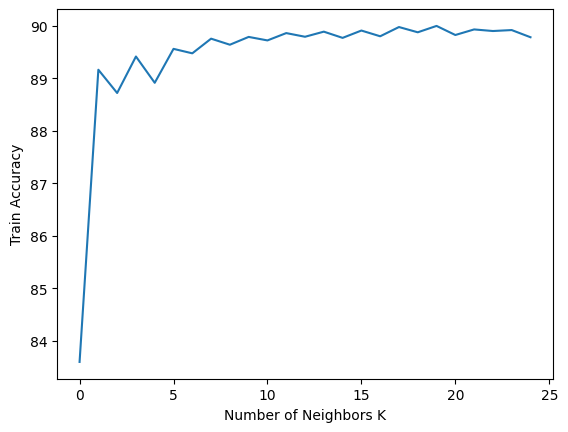

In [17]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7163  116]
 [ 730  229]]
90.0


## Логістична Регресія

In [22]:
models = pd.DataFrame({
                'Models': 'LogisticRegression',
                'Score':  [LOGCV]}) 

models.sort_values(by='Score', ascending=False)

,Models,Score
0,LogisticRegression,0.8967


**Висновки по моделям (детальні)**

1.  Модель логістичної регресії демонструє високу точність на тестовому наборі даних. Це свідчить про те, що модель ефективно навчається на даних та може бути використана для прогнозування з високою ймовірністю.
2.  Оптимальна кількість сусідів для алгоритму k-NN становить 19, що дає точність 90,0%. Це означає, що при використанні 19 найближчих сусідів для прогнозування класу нової точки даних алгоритм k-NN досягає найвищої точності